In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [46]:
df = pd.read_csv('satisfaction_experience.csv')
df.head()

,Experience (années),Satisfaction (score/10)
0,14.981605,5.253773
1,38.028572,8.749232
2,29.279758,7.748029
3,23.946339,6.302080
4,6.240746,6.241509


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Experience (années)      200 non-null    float64
 1   Satisfaction (score/10)  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [48]:
df.describe()

,Experience (années),Satisfaction (score/10)
count,200.000000,200.000000
mean,19.360249,6.377161
std,11.795657,1.597633
min,0.220885,2.797793
25%,9.143297,4.978726
50%,19.779450,6.367594
75%,30.274385,7.751331
max,39.475477,9.753254


In [49]:
print(f"il y'a {df.isnull().sum()} valeurs nulles dans le dataset")
print(f"il y'a {df.duplicated().sum()} valeurs dupliquées dans le dataset")

il y'a Experience (années)        0
Satisfaction (score/10)    0
dtype: int64 valeurs nulles dans le dataset
il y'a 0 valeurs dupliquées dans le dataset


**CORRELATION DE PEARSON**

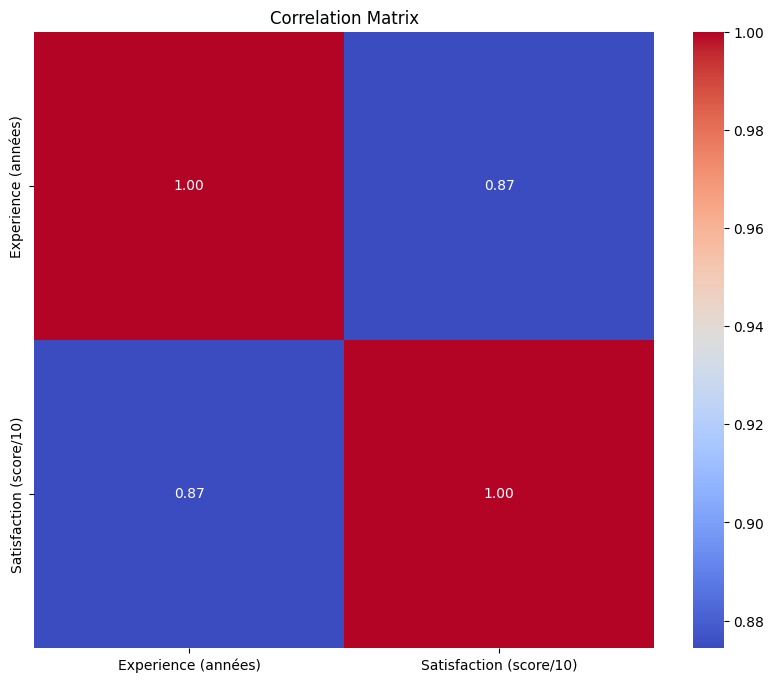

In [50]:
#matrice de correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='pearson'), annot=True,fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


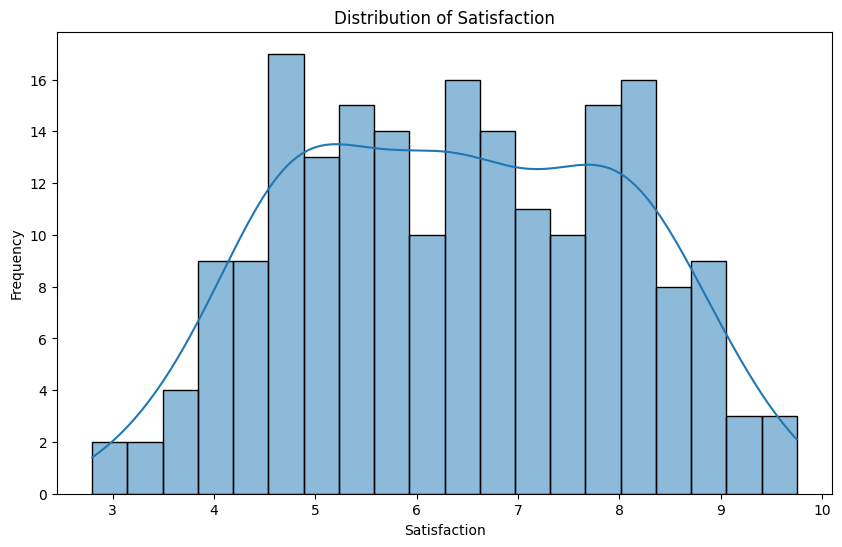

In [51]:
#distribution de satisfaction
plt.figure(figsize=(10, 6))
sns.histplot(df['Satisfaction (score/10)'], bins=20, kde=True)
plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.show()

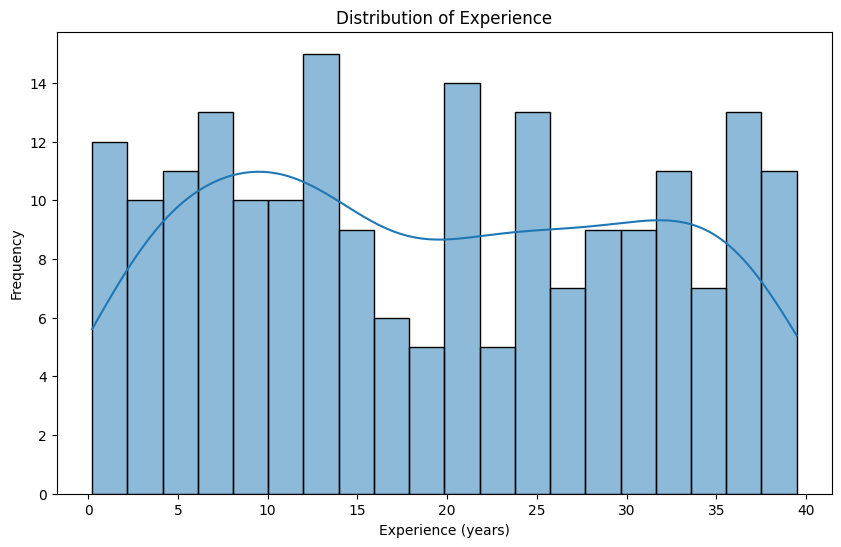

In [52]:
#distribution de l'experience
plt.figure(figsize=(10, 6))
sns.histplot(df['Experience (années)'], bins=20, kde=True)
plt.title('Distribution of Experience')
plt.xlabel('Experience (years)')
plt.ylabel('Frequency')
plt.show()

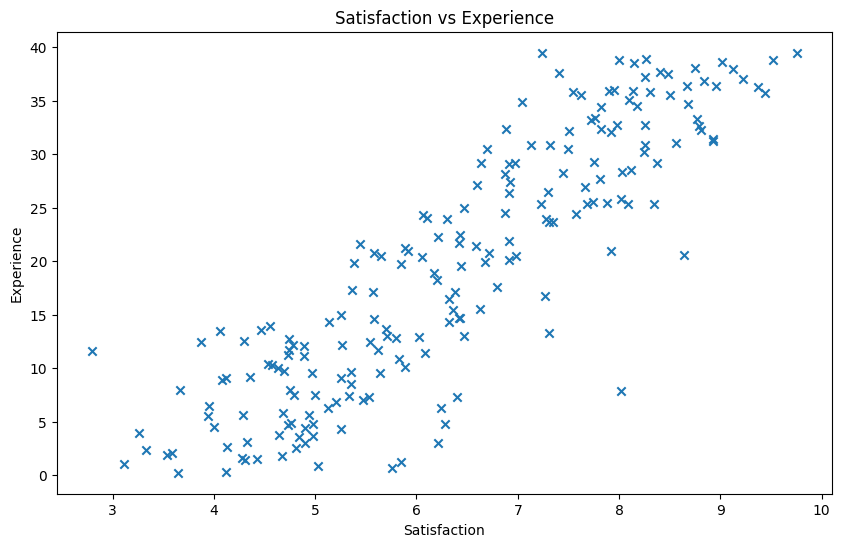

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Satisfaction (score/10)'], df['Experience (années)'], marker='x')
plt.xlabel('Satisfaction')
plt.ylabel('Experience')
plt.title('Satisfaction vs Experience')
plt.show()

In [54]:
model = LinearRegression()
X = df[['Experience (années)']]
y = df['Satisfaction (score/10)']
model.fit(X, y)


LinearRegression()

In [55]:
coef = model.coef_[0]
intercept = model.intercept_
print(f"Coefficient : {coef:.3f}")
print(f"Équation de la régression : y = {coef:.3f}X + {intercept:.3f}")

Coefficient : 0.118
Équation de la régression : y = 0.118X + 4.084


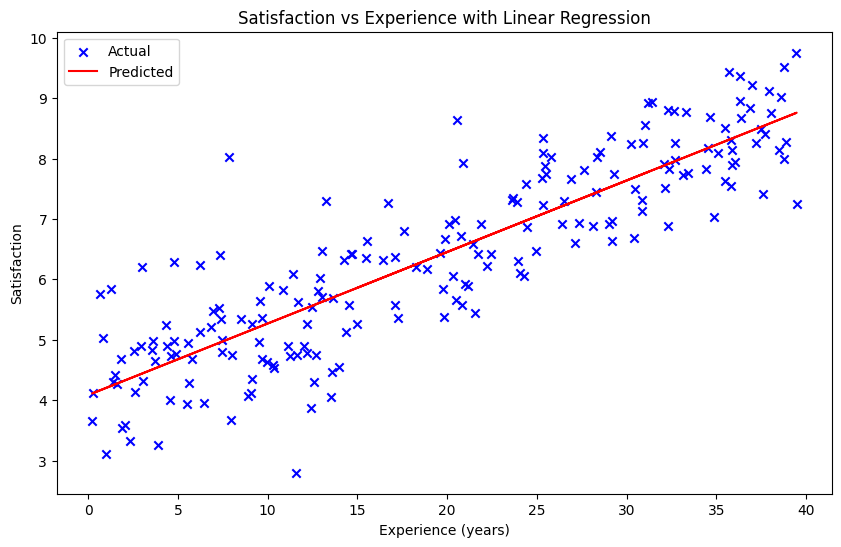

In [56]:
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue',marker='x', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Experience (years)')
plt.ylabel('Satisfaction')
plt.title('Satisfaction vs Experience with Linear Regression')
plt.legend()
plt.show()

In [57]:
# Calcul du coefficient de corrélation de Pearson
correlation = df['Satisfaction (score/10)'].corr(df['Experience (années)'])
print(f"Coefficient de corrélation de Pearson : {correlation:.3f}")

# Calcul du coefficient de détermination R²
r_squared = model.score(X, y)
print(f"Coefficient de détermination R² : {r_squared:.3f}")

Coefficient de corrélation de Pearson : 0.874
Coefficient de détermination R² : 0.765


In [58]:
# Tester la significativité de cette corelation
r, p_value = stats.pearsonr(df['Satisfaction (score/10)'], df['Experience (années)'])
alpha = 0.05
if p_value < alpha:
    print("Il y a une corrélation significative entre la satisfaction et l'expérience.")
else:
    print("Il n'y a pas de corrélation significative entre la satisfaction et l'expérience.")

Il y a une corrélation significative entre la satisfaction et l'expérience.


In [59]:
# Test de normalité
from scipy.stats import shapiro
stat, p = shapiro(df['Satisfaction (score/10)'])
print(f"Statistique de Shapiro-Wilk : {stat:.3f}, p-value : {p:.3f}")
# Interprétation du test de Shapiro-Wilk
alpha = 0.05
if p > alpha:
    print("La distribution de la satisfaction est normale (on ne peut pas rejeter H0).")
else:
    print("La distribution de la satisfaction n'est pas normale (on rejette H0).")

Statistique de Shapiro-Wilk : 0.977, p-value : 0.003
La distribution de la satisfaction n'est pas normale (on rejette H0).


**CORRELATION DE SPEARMAN**

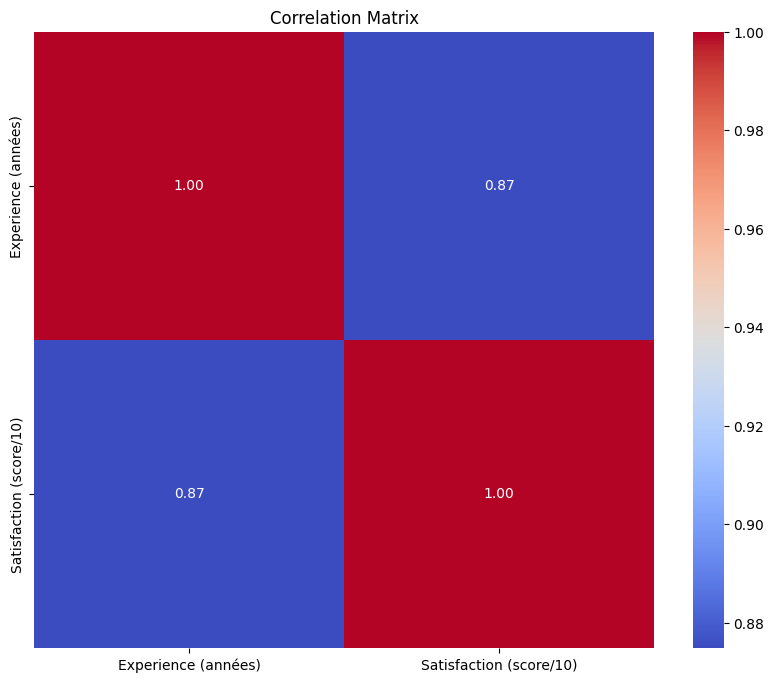

In [60]:
#matrice de correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), annot=True,fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


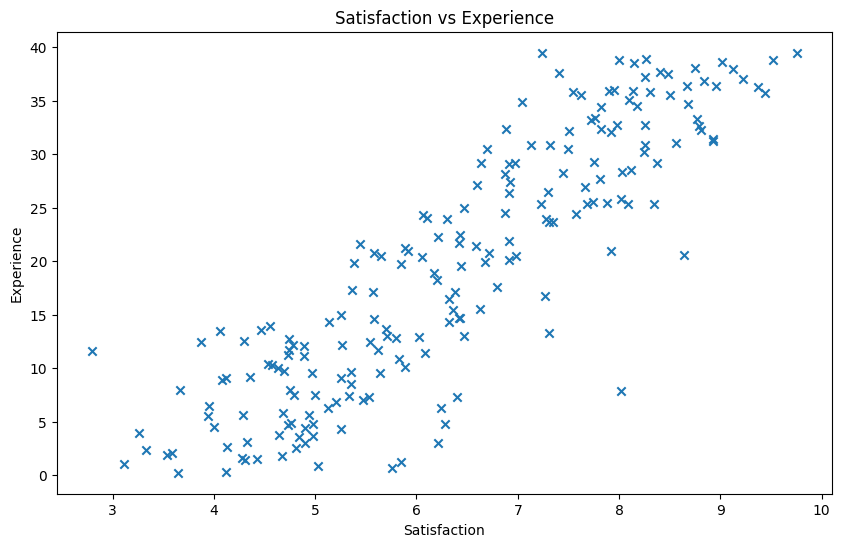

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Satisfaction (score/10)'], df['Experience (années)'], marker='x')
plt.xlabel('Satisfaction')
plt.ylabel('Experience')
plt.title('Satisfaction vs Experience')
plt.show()

In [66]:
# modele de regression de spearman
model = LinearRegression()
X = df[['Experience (années)']]
y = df['Satisfaction (score/10)']  
model.fit(X, y)

LinearRegression()

In [67]:
coef = model.coef_[0]
intercept = model.intercept_
print(f"Coefficient : {coef:.3f}")
print(f"Équation de la régression : y = {coef:.3f}X + {intercept:.3f}")

Coefficient : 0.118
Équation de la régression : y = 0.118X + 4.084


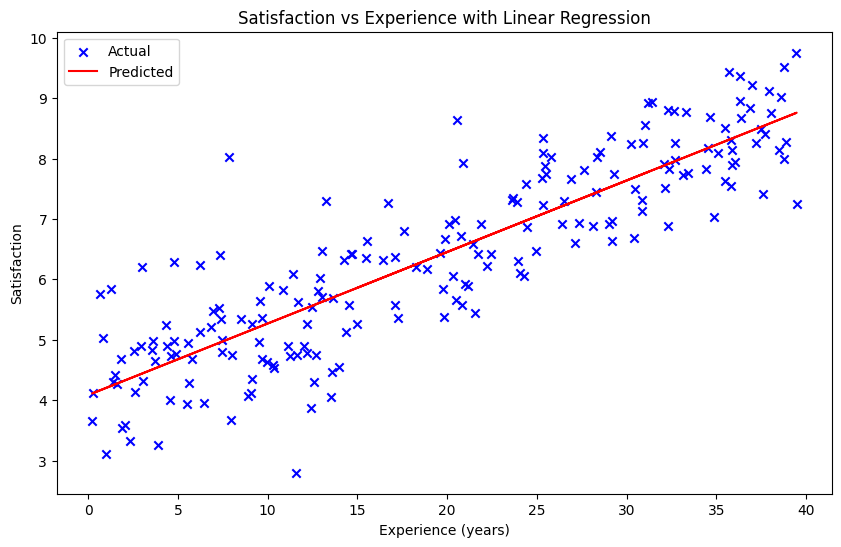

In [68]:
# Prédictions de spearman
y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue',marker='x', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Experience (years)')
plt.ylabel('Satisfaction')
plt.title('Satisfaction vs Experience with Linear Regression')
plt.legend()
plt.show()

In [69]:
# Calcul du coefficient de corrélation de Spearman
correlation = df['Satisfaction (score/10)'].corr(df['Experience (années)'], method='spearman')
print(f"Coefficient de corrélation de Spearman : {correlation:.3f}")
# Calcul du coefficient de détermination R²
r_squared = model.score(X, y)
print(f"Coefficient de détermination R² : {r_squared:.3f}")

Coefficient de corrélation de Spearman : 0.875
Coefficient de détermination R² : 0.765


In [70]:
# Tester la significativité de cette corelation
r, p_value = stats.spearmanr(df['Satisfaction (score/10)'], df['Experience (années)'])
alpha = 0.05
if p_value < alpha:
    print("Il y a une corrélation significative entre la satisfaction et l'expérience.")
else:
    print("Il n'y a pas de corrélation significative entre la satisfaction et l'expérience.")

Il y a une corrélation significative entre la satisfaction et l'expérience.


In [71]:
# Test de normalité
from scipy.stats import shapiro
stat, p = shapiro(df['Satisfaction (score/10)'])
print(f"Statistique de Shapiro-Wilk : {stat:.3f}, p-value : {p:.3f}")
# Interprétation du test de Shapiro-Wilk
alpha = 0.05
if p > alpha:
    print("La distribution de la satisfaction est normale (on ne peut pas rejeter H0).")
else:
    print("La distribution de la satisfaction n'est pas normale (on rejette H0).")

Statistique de Shapiro-Wilk : 0.977, p-value : 0.003
La distribution de la satisfaction n'est pas normale (on rejette H0).


In [74]:
def compare_correlations(df, col1, col2, method1='pearson', method2='spearman'):
    # Calcul des corrélations
    corr1 = df[col1].corr(df[col2], method=method1)
    corr2 = df[col1].corr(df[col2], method=method2)
    
    # Affichage des résultats
    print(f"Corrélation de {method1} entre {col1} et {col2}: {corr1:.3f}")
    print(f"Corrélation de {method2} entre {col1} et {col2}: {corr2:.3f}")
# Exemple d'utilisation de la fonction
compare_correlations(df, 'Satisfaction (score/10)', 'Experience (années)', method1='pearson', method2='spearman')

Corrélation de pearson entre Satisfaction (score/10) et Experience (années): 0.874
Corrélation de spearman entre Satisfaction (score/10) et Experience (années): 0.875


In [75]:
# Expliquer dans quel cas il est préférable d'utiliser Spearman au lieu de pearson
print("il est préférable d'utiliser Spearman au lieu de Pearson lorsque les données ne suivent pas une distribution normale ou lorsque les relations entre les variables sont non linéaires. Spearman est également plus robuste aux valeurs aberrantes, car il se base sur les rangs des données plutôt que sur leurs valeurs absolues.")
# Expliquer la différence entre Pearson et Spearman
print("utiliser la méthode de Pearson pour mesurer la corrélation entre deux variables quantitatives, tandis que Spearman est utilisé pour mesurer la corrélation entre deux variables ordinales ou lorsque les données ne suivent pas une distribution normale. Pearson mesure la force et la direction de la relation linéaire entre deux variables, tandis que Spearman mesure la force et la direction de la relation monotone entre deux variables.")

il est préférable d'utiliser Spearman au lieu de Pearson lorsque les données ne suivent pas une distribution normale ou lorsque les relations entre les variables sont non linéaires. Spearman est également plus robuste aux valeurs aberrantes, car il se base sur les rangs des données plutôt que sur leurs valeurs absolues.
utiliser la méthode de Pearson pour mesurer la corrélation entre deux variables quantitatives, tandis que Spearman est utilisé pour mesurer la corrélation entre deux variables ordinales ou lorsque les données ne suivent pas une distribution normale. Pearson mesure la force et la direction de la relation linéaire entre deux variables, tandis que Spearman mesure la force et la direction de la relation monotone entre deux variables.
